<a href="https://colab.research.google.com/github/olgasem10/Compling-tasks/blob/master/BigARTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!apt-get --yes install git make cmake build-essential libboost-all-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
make is already the newest version (4.1-9.1ubuntu1).
libboost-all-dev is already the newest version (1.65.1.0ubuntu1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
git is already the newest version (1:2.17.1-1ubuntu0.5).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


In [4]:
!pip install protobuf tqdm wheel

In [5]:
!git clone --branch=stable https://github.com/bigartm/bigartm.git

fatal: destination path 'bigartm' already exists and is not an empty directory.


In [6]:
cd bigartm

/content/bigartm


In [7]:
mkdir build

mkdir: cannot create directory ‘build’: File exists


In [6]:
cd build

/content/bigartm/build


In [7]:
!cmake ..

-- The C compiler identification is GNU 7.4.0
-- The CXX compiler identification is GNU 7.4.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Build type: Release
-- Looking for include file unistd.h
-- Looking for include file unistd.h - found
-- Boost version: 1.65.1
-- Looking for pthread.h
-- Looking for pthread.h - found
-- Looking for pthread_create
-- Looking for pthread_create - not found
-- Looking for pthread_create in pthreads
-- Looking for pthread_create in pthreads - not found
-- Looking for pthread_create in pthread
-- Lookin

In [8]:
!make

Scanning dependencies of target libprotobuf
[  0%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/arena.cc.o
[  0%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/arenastring.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/extension_set.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/generated_message_util.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/coded_stream.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/zero_copy_stream.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/zero_copy_stream_impl_lite.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/

In [9]:
!pip install python/bigartm*.whl -U

Processing ./python/bigartm-0.10.0-cp36-cp36m-linux_x86_64.whl


In [10]:
cd ../.. 

/content


In [11]:
!pip install pymorphy2[fast] nltk gensim

     |████████████████████████████████| 51kB 918kB/s 
     |████████████████████████████████| 7.1MB 3.1MB/s 
     |████████████████████████████████| 256kB 22.3MB/s 
  Created wheel for DAWG: filename=DAWG-0.7.8-cp36-cp36m-linux_x86_64.whl size=768166 sha256=4f10cecbba94d4a21480c9b87f2b33bbaab1effefda4288b6b7634041ad7fd3c
  Stored in directory: /root/.cache/pip/wheels/d4/88/d0/4e4abc83eb8f59a71e8dbd8ba99fd5615a3af1fac1ef7f8825
Successfully built DAWG


In [8]:
import artm
%matplotlib inline
import glob
import os, re
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from nltk.corpus import stopwords
import numpy as np
from pymorphy2 import MorphAnalyzer
import gensim, nltk
import string
morph = MorphAnalyzer()
from nltk.tokenize import word_tokenize

/usr/local/lib/python3.6/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [9]:
nltk.download('punkt');nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
string.punctuation += '«»—–…“”•№→’€'
symbols = string.punctuation + '1234567890'

In [17]:
symbols

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~«»—–…“”•№→’€1234567890'

In [0]:
stops = set(stopwords.words('russian')) | {'gt', 'который', 'это'}

def remove_tags(text):
    text = re.sub(r'<[^>]+>', '', text)
    return text

def tokenize(text):
    words = [word.strip(symbols) for word in text.split()]
    words = [word for word in words if word and not ';' in word]
    return words

def opt_normalize(texts, top=None):
    uniq = Counter()
    for text in texts:
        uniq.update(text)
    
    norm_uniq = {word:morph.parse(word.replace(':', ''))[0].normal_form for word, _ in uniq.most_common(top)}
    
    norm_texts = []
    for text in texts:
        norm_words = [norm_uniq.get(word) for word in text]
        norm_words = [word for word in norm_words if word and word not in stops]
        norm_texts.append(norm_words)
        
    return norm_texts

Обучение модели

In [14]:
!wget https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/habr_texts.txt.zip

--2020-02-03 13:36:26--  https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/habr_texts.txt.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/habr_texts.txt.zip [following]
--2020-02-03 13:36:27--  https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/habr_texts.txt.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18645068 (18M) [application/zip]
Saving to: ‘habr_texts.txt.zip’

habr_texts.txt.zip  100%[===================>]  17.78M   109MB/s    in 0.2s    

2020-02-03 13:36:30 (109 MB/s) - ‘habr_texts.tx

In [15]:
!unzip habr_texts.txt.zip

Archive:  habr_texts.txt.zip
  inflating: habr_texts.txt          


In [0]:
texts = open('habr_texts.txt').read().splitlines()
texts = opt_normalize([tokenize(remove_tags(text.lower())) for text in texts], 30000)

In [0]:
ph = gensim.models.Phrases(texts, scoring='npmi', threshold=0.3, common_terms = stops) 
p = gensim.models.phrases.Phraser(ph)
ngrammed_habr_texts = p[texts]

In [0]:
f = open('habr_texts.vw', 'w')

for i, text in enumerate(ngrammed_habr_texts):
    c = Counter(text)
    doc = 'doc_'+ str(i) + ' '
    vw_text = ' '.join([x+':'+str(c[x]) for x in c])
    
    f.write(doc + vw_text  + '\n')
f.close()

In [0]:
#from google.colab import files
#files.download('habr_texts.vw') 

In [0]:
def print_measures(model_artm):
    print('Sparsity Phi: {0:.3f} ARTM)'.format(
        model_artm.score_tracker['SparsityPhiScore'].last_value)
)
    print('Sparsity Theta: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['SparsityThetaScore'].last_value))

    print('Kernel contrast: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_contrast))

    print('Kernel purity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_purity))

    print('Perplexity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['PerplexityScore'].last_value)
)
    plt.plot(range(model_artm.num_phi_updates), model_artm.score_tracker['PerplexityScore'].value, 'r--', linewidth=2)
    plt.xlabel('Iterations count')
    plt.ylabel(' ARTM perp. (red)')
    plt.grid(True)
    plt.show()

In [0]:
batch_vectorizer = artm.BatchVectorizer(data_path='habr_texts.vw',  # название файла
                                        data_format='vowpal_wabbit', # формат файла, у нас vw
                                        target_folder='batches', # название папки в которую положаться батчи
                                       batch_size=1000) # размер батча, подбирайте под свою память

In [0]:
batch_vectorizer = artm.BatchVectorizer(data_path='batches', # название папки с батчами
                                        data_format='batches') # указываем формат - батчи

In [0]:
# инициализируем словарь, чтобы сделать модель
dictionary = artm.Dictionary()

In [23]:
dictionary.gather(data_path='batches')
dictionary.filter(class_id='@default_class',
                  min_df=10, max_df=2000)

artm.Dictionary(name=c93b1ce3-4a42-417f-9727-e266e59a510f, num_entries=13961)

In [0]:
dictionary.save_text('dict.txt')

In [0]:
from google.colab import files
files.download('dict.txt')

# Модель 1


In [0]:
model_artm = artm.ARTM(topic_names=['topic_{}'.format(i) for i in range(200)],
                       
                       regularizers=[
                           artm.DecorrelatorPhiRegularizer(
                                            name='Decorr', tau=0.25, 
                                            class_ids=['@default_class'],
                                            topic_names=['topic_{}'.format(i) for i in range(0, 200)]),
                           
                           artm.SmoothSparsePhiRegularizer(
                                            name='SmoothPhi_1', 
                                            class_ids=['@default_class'],
                                            tau=0.15, 
                                            topic_names=['topic_{}'.format(i) for i in range(0, 200)])
                                    ]
                        )

In [0]:
model_artm.initialize(dictionary=dictionary, )

In [0]:
model_artm.scores.add(artm.PerplexityScore(name='PerplexityScore',
                                                    dictionary=dictionary))
model_artm.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore')) 
model_artm.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore')) 
model_artm.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.1)) 
model_artm.scores.add(artm.TopTokensScore(class_id='@default_class', name='TopTokensScore_1', num_tokens=10)) 

In [0]:
model_artm.num_document_passes = 2
model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=3)

Регуляризаторы

In [0]:
model_artm.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.15, 
                                                            topic_names=['topic_{}'.format(i) for i in range(1, 200)],
                                                            ))
model_artm.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.15, 
                                                              topic_names=['topic_{}'.format(i) for i in range(1, 200)]))

In [0]:
model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)

In [0]:
phi_tau = model_artm.regularizers['SparsePhi'].tau
theta_tau = model_artm.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.5))
    model_artm.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.1))
    
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)
    

# Модель 2



In [0]:
model_artm2 = artm.ARTM(topic_names=['topic_{}'.format(i) for i in range(100)],
                       
                       regularizers=[
                           artm.DecorrelatorPhiRegularizer(
                                            name='Decorr', tau=0.5, 
                                            class_ids=['@default_class'],
                                            topic_names=['topic_{}'.format(i) for i in range(0, 100)]),
                           
                           artm.SmoothSparsePhiRegularizer(
                                            name='SmoothPhi_1', 
                                            class_ids=['@default_class'],
                                            tau=0.3, 
                                            topic_names=['topic_{}'.format(i) for i in range(0, 100)])
                                    ]
                        )

In [0]:
model_artm2.initialize(dictionary=dictionary, )

In [0]:
model_artm2.scores.add(artm.PerplexityScore(name='PerplexityScore',
                                                    dictionary=dictionary))
model_artm2.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore')) 
model_artm2.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore')) 
model_artm2.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.1)) 
model_artm2.scores.add(artm.TopTokensScore(class_id='@default_class', name='TopTokensScore_1', num_tokens=10)) 

In [0]:
model_artm2.num_document_passes = 2
model_artm2.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=3)

In [0]:
model_artm2.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.15, 
                                                            topic_names=['topic_{}'.format(i) for i in range(1, 100)],
                                                            ))
model_artm2.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.15, 
                                                              topic_names=['topic_{}'.format(i) for i in range(1, 100)]))

In [0]:
model_artm2.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)

In [0]:
phi_tau = model_artm2.regularizers['SparsePhi'].tau
theta_tau = model_artm2.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm2.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.5))
    model_artm2.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.1))
    
    model_artm2.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)
    

Sparsity Phi: 0.950 ARTM)
Sparsity Theta: 0.212 (ARTM)
Kernel contrast: 0.394 (ARTM)
Kernel purity: 0.802 (ARTM)
Perplexity: 545.200 (ARTM)


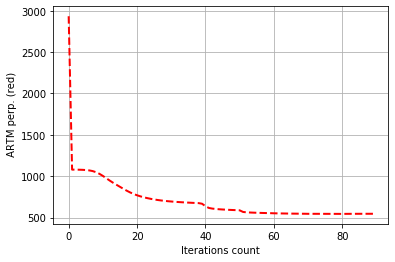

In [117]:
print_measures(model_artm2)

# Модель 3

In [0]:
model_artm3 = artm.ARTM(topic_names=['topic_{}'.format(i) for i in range(200)],
                       
                       regularizers=[
                           artm.DecorrelatorPhiRegularizer(
                                            name='Decorr', tau=0.5, 
                                            class_ids=['@default_class'],
                                            topic_names=['topic_{}'.format(i) for i in range(0, 200)]),
                           
                           artm.SmoothSparsePhiRegularizer(
                                            name='SmoothPhi_1', 
                                            class_ids=['@default_class'],
                                            tau=0.3, 
                                            topic_names=['topic_{}'.format(i) for i in range(0, 200)])
                                    ]
                        )

In [0]:
model_artm3.initialize(dictionary=dictionary, )

In [0]:
model_artm3.scores.add(artm.PerplexityScore(name='PerplexityScore',
                                                    dictionary=dictionary))
model_artm3.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore')) 
model_artm3.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore')) 
model_artm3.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.1)) 
model_artm3.scores.add(artm.TopTokensScore(class_id='@default_class', name='TopTokensScore_1', num_tokens=10)) 

In [0]:
model_artm3.num_document_passes = 2
model_artm3.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=3)

In [0]:
model_artm3.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.15, 
                                                            topic_names=['topic_{}'.format(i) for i in range(1, 200)],
                                                            ))
model_artm3.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.15, 
                                                              topic_names=['topic_{}'.format(i) for i in range(1, 200)]))

In [0]:
model_artm3.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)

In [0]:
phi_tau = model_artm3.regularizers['SparsePhi'].tau
theta_tau = model_artm3.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm3.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.5))
    model_artm3.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.1))
    
    model_artm3.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)
    

Sparsity Phi: 0.975 ARTM)
Sparsity Theta: 0.418 (ARTM)
Kernel contrast: 0.470 (ARTM)
Kernel purity: 0.862 (ARTM)
Perplexity: 482.459 (ARTM)


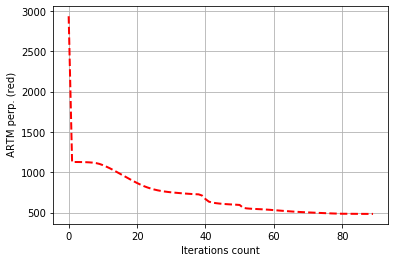

In [165]:
print_measures(model_artm3)

# Модель 4

In [0]:
model_artm4 = artm.ARTM(topic_names=['topic_{}'.format(i) for i in range(200)],
                       
                       regularizers=[
                           artm.DecorrelatorPhiRegularizer(
                                            name='Decorr', tau=0.2, 
                                            class_ids=['@default_class'],
                                            topic_names=['topic_{}'.format(i) for i in range(0, 200)]),
                           
                           artm.SmoothSparsePhiRegularizer(
                                            name='SmoothPhi_1', 
                                            class_ids=['@default_class'],
                                            tau=0.1, 
                                            topic_names=['topic_{}'.format(i) for i in range(0, 200)])
                                    ]
                        )

In [0]:
model_artm4.initialize(dictionary=dictionary, )

In [0]:
model_artm4.scores.add(artm.PerplexityScore(name='PerplexityScore',
                                                    dictionary=dictionary))
model_artm4.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore')) 
model_artm4.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore')) 
model_artm4.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.1)) 
model_artm4.scores.add(artm.TopTokensScore(class_id='@default_class', name='TopTokensScore_1', num_tokens=10)) 

In [0]:
model_artm4.num_document_passes = 2
model_artm4.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=3)

In [0]:
model_artm4.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.15, 
                                                            topic_names=['topic_{}'.format(i) for i in range(1, 200)],
                                                            ))
model_artm4.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.15, 
                                                              topic_names=['topic_{}'.format(i) for i in range(1, 200)]))

In [0]:
model_artm4.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)

In [0]:
phi_tau = model_artm4.regularizers['SparsePhi'].tau
theta_tau = model_artm4.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm4.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.5))
    model_artm4.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.1))
    
    model_artm4.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)
    

# Лучшая модель

In [73]:
for i in [13, 60, 103]:
    print(model_artm4.topic_names[i])
    print(model_artm4.score_tracker['TopTokensScore_1'].last_tokens[model_artm4.topic_names[i]])
    print('\n')

topic_13
['товар', 'покупка', 'магазин', 'заказ', 'покупатель', 'скидка', 'продажа', 'предложение', 'акция', 'цена']


topic_60
['земля', 'спутник', 'аппарат', 'космический', 'планета', 'полёт', 'космос', 'луна', 'марс', 'орбита']


topic_103
['пациент', 'клетка', 'животное', 'врач', 'болезнь', 'заболевание', 'организм', 'ген', 'лечение', 'бактерия']




Sparsity Phi: 0.970 ARTM)
Sparsity Theta: 0.398 (ARTM)
Kernel contrast: 0.390 (ARTM)
Kernel purity: 0.816 (ARTM)
Perplexity: 461.088 (ARTM)


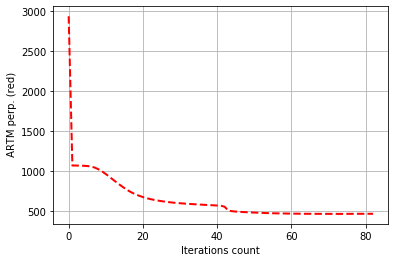

In [74]:
print_measures(model_artm4)

Параметры модели:

200 тем, использованы регуляризатор декоррелляции (tau = 0,2) и сглаживания (tau = 0,1)

Перплексия снижалась до 42 итераций

После этого одновременно добавлены регуляризаторы разреженности тем и документов(tau = -0.15)

Перплексия снижалась до 70 итераций